### Import Dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
X, y = mnist['data'], mnist['target']
print('X:', X.shape)
print('y:', y.shape)

X: (70000, 784)
y: (70000,)


### Visualize Image

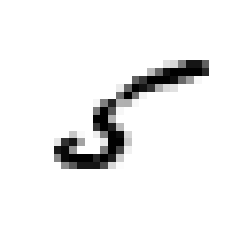

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[11]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

### Split

In [4]:
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train = y_train.astype(np.int8)

In [5]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Binary Classifier

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

### Cross-Validation

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.96065
0.9637
0.9532


In [10]:
# Test every image as not 5
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [11]:
from sklearn.model_selection import cross_val_score
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# If 10% of the images are 5, then if you just guess that none of them are 5, you are 90% correct

array([0.90915, 0.90955, 0.91025])

### Confusion Matrix

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53788,   791],
       [ 1985,  3436]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision Score:', precision_score(y_train_5, y_train_pred))
print('Recall Score:', recall_score(y_train_5, y_train_pred))
print('F1 Score:', f1_score(y_train_5, y_train_pred))

Precision Score: 0.81286964750414
Recall Score: 0.6338313964213245
F1 Score: 0.7122719734660032
